<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch2_Intersection_GraphingCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding the intersection of two functions

This is the **master** branch version. We suggest you first try the [**student**](https://github.com/stephenbeckr/numerical-analysis-class/blob/student/Demos/Ch2_Intersection_GraphingCalculator.ipynb) branch version, which has open-ended questions.


### Finding intersections of two functions
This is something you might have done in high school on a graphing calculator (the particular functions we're using are inspired by this [post about using the TI-84+](https://www.dummies.com/education/graphing-calculators/how-to-find-points-of-intersection-on-the-ti-84-plus/)).

![TI-84 image](https://github.com/stephenbeckr/numerical-analysis-class/raw/master/Demos/img/398635.image0.jpg)

Let's find the intersection of
$$ f(x) = .2(x-2)x(x+4)  \quad\text{and}\quad g(x) = .5 x $$

First, let's plot the functions:
(for plotting, here's a list of [style sheets](https://matplotlib.org/3.3.1/gallery/style_sheets/style_sheets_reference.html) to use with `plt.style.use`, and [general matplotlib cheatsheets](https://github.com/matplotlib/cheatsheets); if you want to make the axes through the origin, like in the TI-84 picture, this [stackoverflow post](https://stackoverflow.com/a/25689340) gives several methods)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')

# == First, define the function f
f = lambda x : .2*(x-2)*x*(x+4)


# == Now, define g
g = lambda x : .5*x


# == Now, plot

x   = np.linspace(-10,10,100)

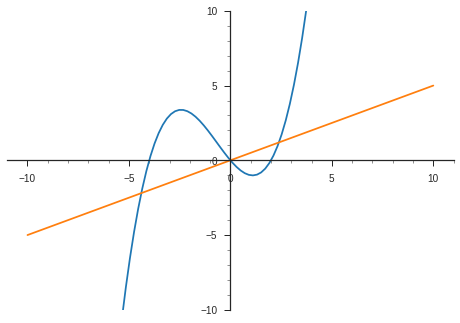

In [ ]:
fig, ax = plt.subplots()
ax.plot( x, f(x) )
ax.plot( x, g(x) )
ax.set_ylim(-10,10)
plt.xticks(range(-10,11,5))
plt.yticks(range(-10,11,5))

# Adjust it to look a bit more like the TI-84 image
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.minorticks_on()
fig.show() # Optional in jupyter

## Now, let's find all the roots (it seems we have three of them, looking at the plots).

Use the builtin root finder from `scipy` (see [`scipy.optimize` documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding)) called `root_scalar`

You can either specify the method you want, or it will pick a default method for you, based on what you supply, e.g.,
- if you supply an **interval** containing the root, using `bracket = [a,b]`, then it will use one of Brent's methods; you can also request using the bisection method
- if you supply an **initial guess** using `x0 = 1.2` (for example), then it will try something like Newton's method. However, you need to give it a bit more information:
  - to actually use **Newton's method** you have to specify a function that computes the derivative, using `fprime = [insert name-of-derivative-function]`
  - you can use the **secant method** which doesn't need the derivative, but then you have to specify a second initial point via `x1 = 1.3` (for example)

In [ ]:
from scipy.optimize import root_scalar

output = root_scalar( lambda x : f(x) - g(x), x0 = -4, x1 = -4.1)
r1     = output.root
print('Found first root at x={} and y={}\n'.format(r1,f(r1)) ) # see https://pyformat.info/ for print statement formatting
output

Found first root at x=-4.3911649915626345 and y=-2.19558249578132



      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: -4.3911649915626345

In [ ]:
output = root_scalar( lambda x : f(x) - g(x), x0 = 0, x1 = .1)
r2     = output.root
print('Found second root at x={} and y={}\n'.format(r2,f(r2)) ) # see https://pyformat.info/ for print statement formatting
output

Found second root at x=0.0 and y=-0.0



      converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 2
           root: 0.0

In [ ]:
output = root_scalar( lambda x : f(x) - g(x), x0 = 2.1, x1 = 2.2)
r3     = output.root
print('Found third root at x={} and y={}\n'.format(r3,f(r3)) ) # see https://pyformat.info/ for print statement formatting
output

Found third root at x=2.3911649915626345 and y=1.1955824957813186



      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 2.3911649915626345

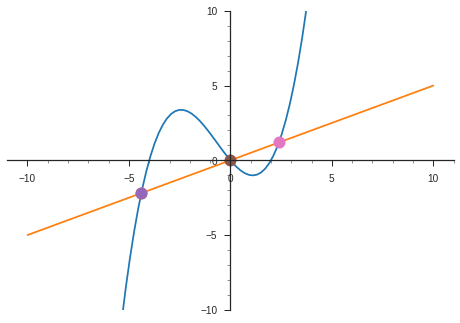

In [ ]:
ax.plot( r1, f(r1), 'o',MarkerSize=12 )
ax.plot( r2, f(r2), 'o',MarkerSize=12 )
ax.plot( r3, f(r3), 'o',MarkerSize=12 )
fig

### Compare accuracy with `roots`

Be careful: despite a similar sounding name, [`numpy.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) is **only for polynomials**.

With a bit of pen-and-paper manipulation, you can cast the above intersection problem as one of finding the roots of a polynomial.  Do this, and then find the roots via `numpy.roots`.

- How can you evaluate the accuracy of your answer?
- Which method (`scipy.optimize.root_scalar` vs `numpy.roots`) is more accurate?


In [ ]:
# Make the polynomial we want to find roots of (i.e., find the coefficients)

coeff = np.poly( (2,0,-4) )  # coefficients of (x-2)*x*(x+4)
# and don't forget to multiply by 0.2
coeff = 0.2*coeff
# and subtract the g(x) function, so -.5*x.  This is the 2nd-to-last coefficient
coeff[-2] -=.5
coeff

array([ 0.2,  0.4, -2.1,  0. ])

In [ ]:
r_numpy = np.roots( coeff )
r_numpy

array([-4.39116499,  2.39116499,  0.        ])

In [ ]:
r_scipy = np.array( (r1,r3,r2 ))  # changed ordering to match np.roots output

residual = lambda x : abs( f(x) - g(x) )
for r_n, r_s in zip(r_numpy,r_scipy):
    print("At root {:5.2f}, the residual using np.roots is {:.2e}, and using root_scalar is {:.2e}".format( r_n, residual(r_n), residual(r_s)) )

At root -4.39, the residual using np.roots is 2.66e-15, and using root_scalar is 2.66e-15
At root  2.39, the residual using np.roots is 2.22e-16, and using root_scalar is 1.33e-15
At root  0.00, the residual using np.roots is 0.00e+00, and using root_scalar is 0.00e+00


Conclusion: in this example, both root finding libraries work just fine

## Let's repeat, for a different function

Again, let's pick a polynomial since we can find the true roots by hand

Let's do $$ f(x) = (x-1) \cdot (x-(1+10^{-8}))^2. $$

Do we expect any conditioning issues?

Yes!  This is almost a double-root at $x=1$, so very shallow slope.  If we perturb $f$ upward a bit, it won't have any roots at all!

### Try to find the roots using the polynomial root-finding routines (`np.roots`)

In [ ]:

trueRoots = (1,1+1e-8)
coeff = np.poly( trueRoots  )
f     = lambda x : np.polyval( coeff, x )

r_numpy = np.roots( coeff )
r_numpy

array([1.+1.49011612e-08j, 1.-1.49011612e-08j])

How did it go?

We got imaginary numbers! This means there were no real roots. But there are! It's just a hard problem, and very ill-conditioned.

The plot of the function will help us

At x = 1 + -1.00e-08, f(x) is 2.22e-16
At x = 1 + -9.39e-09, f(x) is 2.22e-16
At x = 1 + -8.79e-09, f(x) is 2.22e-16
At x = 1 + -8.18e-09, f(x) is 0.00e+00
At x = 1 + -7.58e-09, f(x) is 2.22e-16
At x = 1 + -6.97e-09, f(x) is 2.22e-16
At x = 1 + -6.36e-09, f(x) is 2.22e-16
At x = 1 + -5.76e-09, f(x) is 2.22e-16
At x = 1 + -5.15e-09, f(x) is 0.00e+00
At x = 1 + -4.55e-09, f(x) is 0.00e+00
At x = 1 + -3.94e-09, f(x) is 0.00e+00
At x = 1 + -3.33e-09, f(x) is 0.00e+00
At x = 1 + -2.73e-09, f(x) is 2.22e-16
At x = 1 + -2.12e-09, f(x) is 2.22e-16
At x = 1 + -1.52e-09, f(x) is 0.00e+00
At x = 1 + -9.09e-10, f(x) is 0.00e+00
At x = 1 + -3.03e-10, f(x) is 0.00e+00
At x = 1 + 3.03e-10, f(x) is 0.00e+00
At x = 1 + 9.09e-10, f(x) is 0.00e+00
At x = 1 + 1.52e-09, f(x) is 0.00e+00


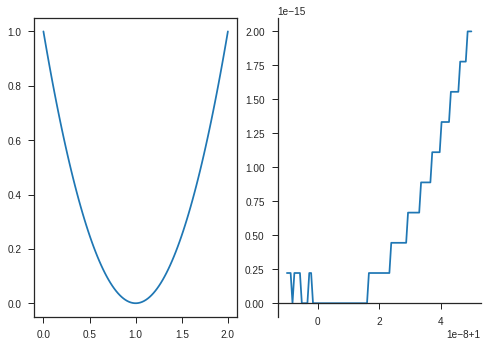

In [ ]:
fig, ax = plt.subplots(1,2);
x = np.linspace(0,2,100)
ax[0].plot( x, f(x) );

# Zoom in a bit
x = np.linspace(1-1e-8,1+5e-8,100);
ax[1].plot( x, f(x) );
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['top'].set_color('none')
ax[1].spines['right'].set_color('none')
f( x[9] )

# from sympy import init_printing
# init_printing()
# list(zip( range(20), f( x[:20] ).tolist() ))

for xx, fx in zip( x[:20], f( x[:20] ) ):
  print("At x = 1 + {:5.2e}, f(x) is {:5.2e}".format(xx-1,fx) )

The table of values shows us the problem!  Within our limited precision, **many** values of x give us a root, since the nearest floating point number is $0$

## Let's try finding the roots via a generic rootfinding method (i.e., ignoring the fact that we have a polynomial)

Call [`root_scalar`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar). 

In [ ]:
coeff_deriv = np.polyder( coeff )
deriv   = lambda x : np.polyval( coeff_deriv, x )
root_scalar( f, x0 = 1.1, fprime = deriv )

      converged: True
           flag: 'converged'
 function_calls: 46
     iterations: 23
           root: 1.0000000162008909

Let's repeat, but with a different evaluation of $f$ (taking advantage that we already know it in factored form)

In [ ]:
f       = lambda x : (x-trueRoots[0])*(x-trueRoots[1]) # different
coeff_deriv = np.polyder( coeff )
deriv   = lambda x : np.polyval( coeff_deriv, x )
out = root_scalar( f, x0 = 1.1, fprime = deriv )
out

      converged: True
           flag: 'converged'
 function_calls: 46
     iterations: 23
           root: 1.0000000176119155

In [ ]:
# What is the relative error?
abs( out.root - trueRoots[1] )/abs(trueRoots[1])

In [ ]:
# We have about 8 digits of accuracy, roughly